# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

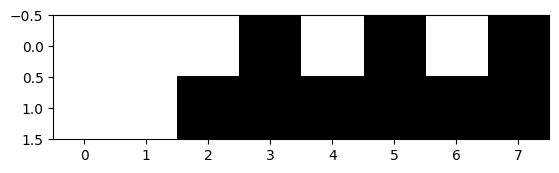

In [2]:
plt.set_cmap('gray')

np.random.seed(117)

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

# Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



# A1

$$
U(x) = \sum_{c \in \mathcal{C}} V_c(x),
$$
where
$$
V_c(x) = V_c(x_s, s \in c)
$$

In this case, $V_c(x_s, x_t) = 0$ if $x_s = x_t$ and $V_c(x_s, x_t) = \beta$ if $x_s \neq x_t$.

We count the transitions between black and white in a 4-neighborhood for each pixel. Since there are 9 such transitions, $U(x) = 9 \beta$.

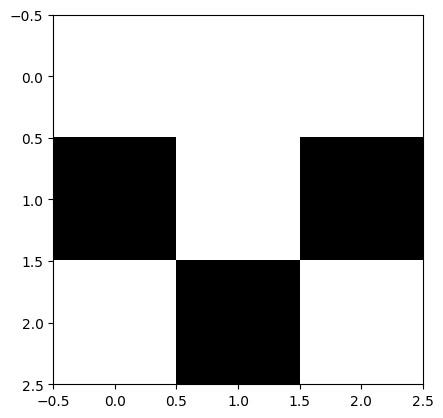

In [3]:
sh=[3,3]

np.random.seed(117)

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

# Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class? (NB: do the calculation for an 8-neighborhood).


# A2

$$
P(X_s = x_s \mid \mathcal{V}_s) = \frac{e^{- U_s(x_s, \mathcal{V}_s)}}{Z^s},
$$
where
$$
Z^s = \sum_{\xi \in E} e^{-U_s(\xi, \mathcal{V}_s)}.
$$

In this example, $E = \{0, 1\}$. So, the 2 local conditional energies are:

$$ U_s(0, \mathcal{V}_s) = 5 \beta $$
$$ U_s(1, \mathcal{V}_s) = 3 \beta $$
Now, we can compute $Z^s$, which is
$$ Z^s = e^{- 5 \beta} + e^{- 3 \beta} $$
So, the conditional probability is
$$ P(X_s = 0 \mid \mathcal{V}_s) = \frac{e^{- 5 \beta}}{e^{- 5 \beta} + e^{- 3 \beta}} $$
$$ P(X_s = 1 \mid \mathcal{V}_s) = \frac{e^{- 3 \beta}}{e^{- 5 \beta} + e^{- 3 \beta}} $$

Since $\beta > 0 $ and $e^{- 3 \beta} > e^{- 5 \beta}$, class $1$ is the most probable.

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



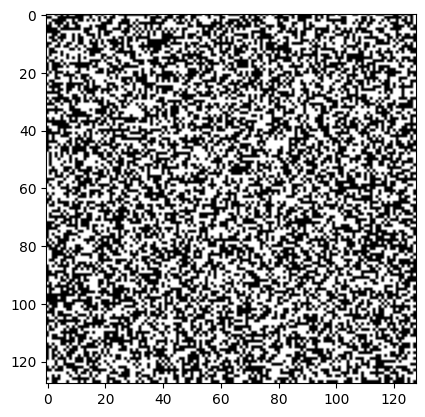

In [4]:
plt.set_cmap('gray')

sh=[128,128]

np.random.seed(117)

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [5]:
def echan(im_bin, beta_reg):
    N, M = im_bin.shape[:2]

    for i in range(N):
        for j in range(M):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1 = (i - 1) % N
            i2 = (i + 1) % N
            j1 = (j - 1) % M
            j2 = (j + 1) % M

        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0 = np.sum(im_bin[[i1, i2, i, i], [j, j, j1, j2]] != 0) * beta_reg
            p0 = math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1 = np.sum(im_bin[[i1, i2, i, i], [j, j, j1, j2]] != 1) * beta_reg
            p1 = math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            Z = p0 + p1
            
            if (Z != 0.):
                if(random.uniform(0,1) < p0 / Z):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

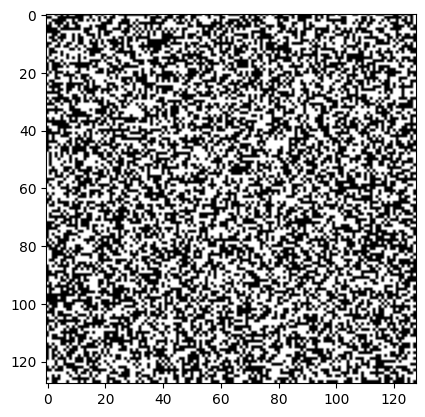

<Figure size 640x480 with 0 Axes>

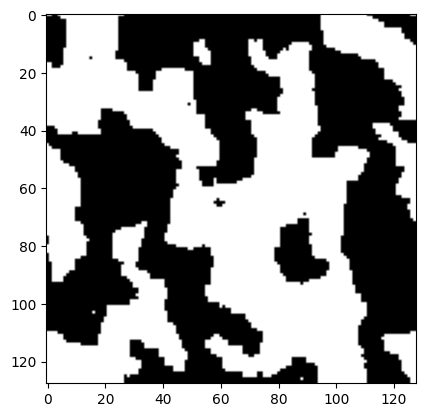

In [6]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
np.random.seed(117)
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=2

mafigure=plt.figure()
#plt.imshow(im_bin);
#mafigure.canvas.draw()
#plt.show()

for n in range(30):
    echan(im_bin,beta_reg)
    #plt.imshow(im_bin)
    #mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

# Q3
Run the program several times. Do you still get the same image? Comment on this.

# A3

No, each run of the algorithm yields a different result. This happens because at each pixel iteration, we choose a random value from 0 to 1 that follows the local conditional distribution. Then, even if all images follow the same probability distribution, the sampled images are different.

# Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

In [7]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
np.random.seed(117)
im_bin=2-np.ceil(2*np.random.rand(*sh))

beta_reg = np.linspace(0.5, 20, 25)
images = []

for beta in beta_reg:
    im = im_bin.copy()
    
    for n in range(30):
        echan(im, beta)
    images.append(im)
    print(beta)

0.5
1.3125
2.125
2.9375
3.75
4.5625
5.375
6.1875
7.0
7.8125
8.625
9.4375
10.25
11.0625
11.875
12.6875
13.5
14.3125
15.125
15.9375
16.75
17.5625
18.375
19.1875
20.0


<Figure size 640x480 with 0 Axes>

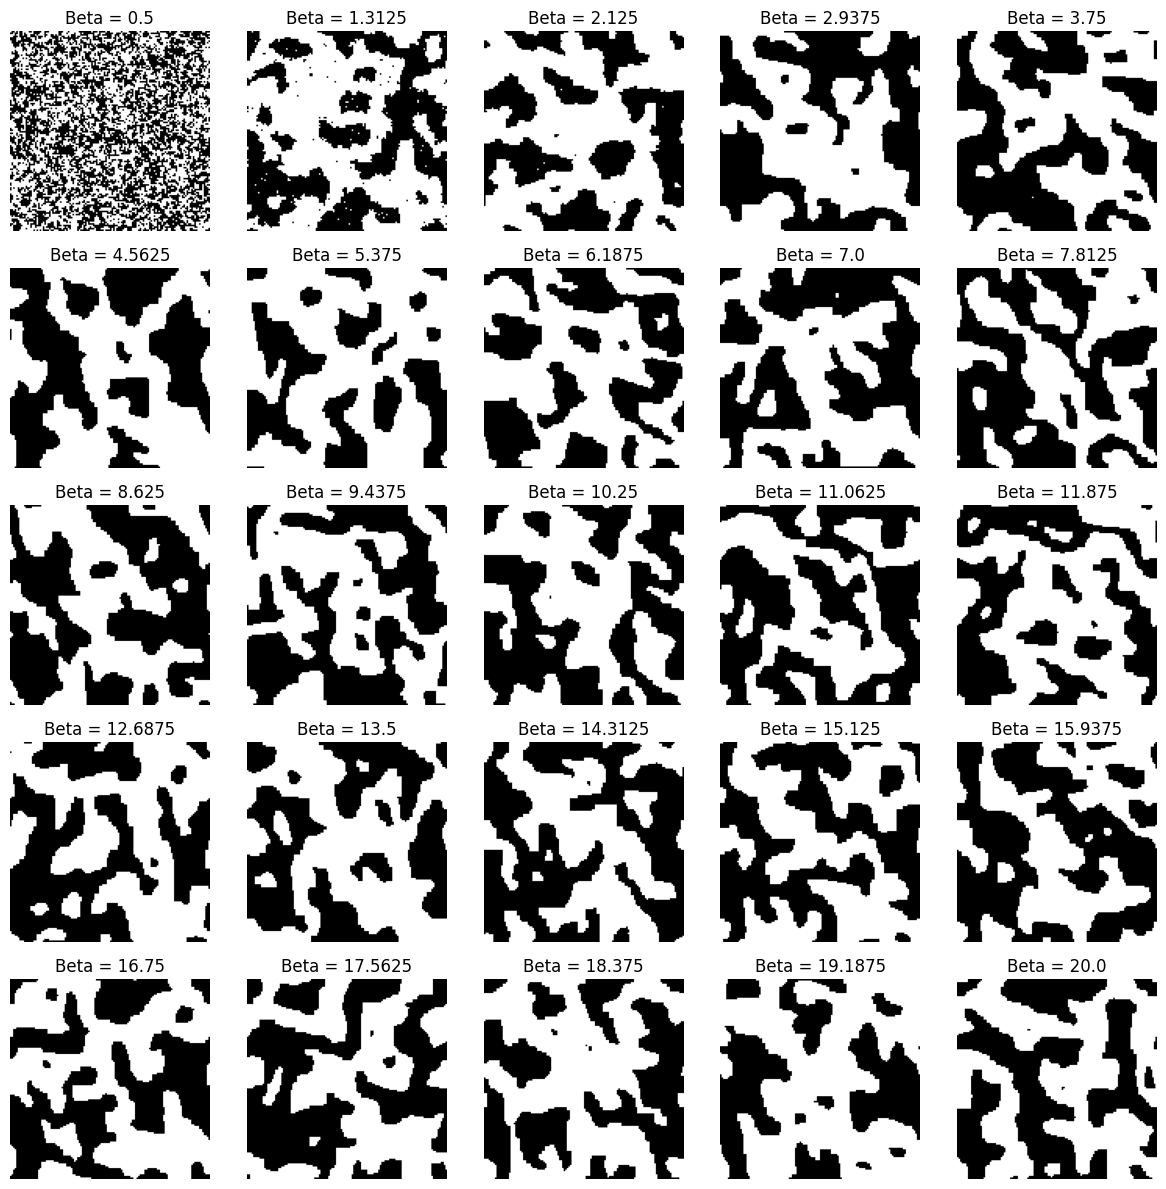

In [8]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap='gray')  # Display the image
    ax.set_title(f'Beta = {beta_reg[i]}')          # Add a title
    ax.axis('off')                        # Remove axes

plt.tight_layout()
plt.show()

# A4

It seems that all images are more or less the same for $\beta \geq 2.125$.
The higher the regularization parameter, the less granular the image becomes.

# Q5
Which image minimizes the overall energy for this model?

# A5

A constant image would minimize the global energy in this model.
This is equivalent to maximizing the probability $P(X = x)$.

# Q6
Change $\beta$ and give it a negative value. Describe the result and justify it.

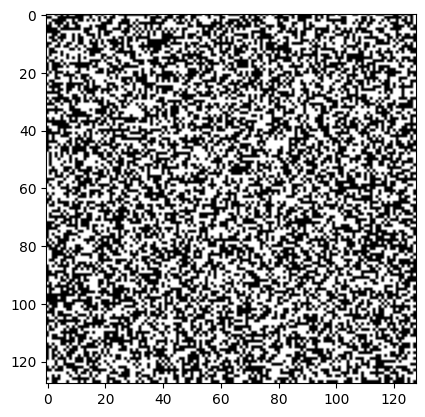

<Figure size 640x480 with 0 Axes>

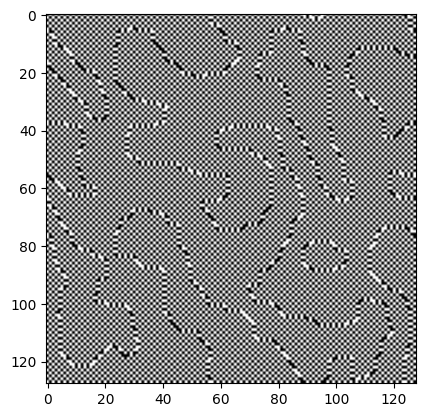

In [9]:
plt.set_cmap('gray')
sh=[128,128]
np.random.seed(117)
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg = -100

mafigure=plt.figure()

for n in range(30):
    echan(im_bin,beta_reg)


plt.figure()
plt.imshow(im_bin)
plt.show()

# A6

Changing the $\beta$ value to be negative makes the generated image follow a checkered pattern.
This happens because the checkered pattern is the one which maximizes the energy in the ising model.
In a sense, the homogeneous regions in the images where $\beta > 0$ turn checkered in this case, while regions that have transitions between black and white become homogeneous when $\beta < 0$.

# Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





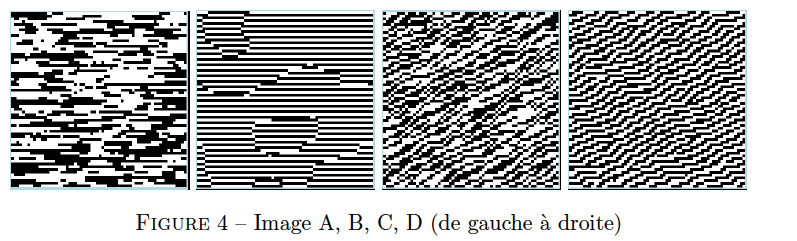

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

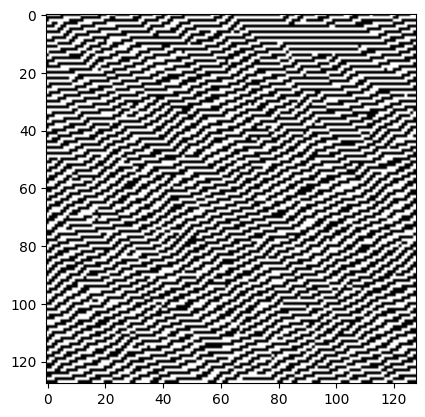

In [10]:
def echan(im_bin, beta_reg):
    N, M = im_bin.shape[:2]

    for i in range(N):
        for j in range(M):
            i1 = (i - 1) % N
            i2 = (i + 1) % N
            j1 = (j - 1) % M
            j2 = (j + 1) % M

            Ureg0 = - np.sum(im_bin[[i, i], [j1, j2]] == 0)
            Ureg0 += np.sum(im_bin[[i1, i2], [j, j]] == 0)
            Ureg0 += - np.sum(im_bin[[i1, i2], [j2, j1]] == 0)
            Ureg0 += np.sum(im_bin[[i1, i2], [j1, j2]] == 0)
            
            p0 = math.exp(-Ureg0 * beta_reg)

            Ureg1 = - np.sum(im_bin[[i, i], [j1, j2]] == 1)
            Ureg1 += np.sum(im_bin[[i1, i2], [j, j]] == 1)
            Ureg1 += - np.sum(im_bin[[i1, i2], [j2, j1]] == 1)
            Ureg1 += np.sum(im_bin[[i1, i2], [j1, j2]] == 1)
            
            p1 = math.exp(-Ureg1 * beta_reg)

            Z = p0 + p1
            
            if (Z != 0.):
                if(random.uniform(0,1) < p0 / Z):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin


plt.set_cmap('gray')
sh=[128,128]
np.random.seed(117)
im_bin=np.ones(sh)

beta_reg = 2

mafigure=plt.figure()

for n in range(30):
    echan(im_bin,beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.show()

# A7

1. We change the ising model so that $U(x_s, x_t) = - \beta$ only if $x_s = x_t$ and $s, t$ are horizontal neighbors. Otherwise, $U(x_s, x_t) = 0$.
2. We add $U(x_s, x_t) = \beta$ if $x_s = x_t$ and $s, t$ are vertical neighbors.
3. We add $U(x_s, x_t) = - \beta$ if $x_s = x_t$ and $s, t$ are diagonal neighbors in direction $\frac{\pi}{4}$.
4. We add $U(x_s, x_t) = \beta$ if $x_s = x_t$ and $s, t$ are diagonal neighbors in direction $\frac{3 \pi}{4}$.

To get output a good result, we consider $\beta = 2$.

# Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

In [12]:
def echan(im_bin, beta_reg):
    N, M = im_bin.shape[:2]

    for i in range(N):
        for j in range(M):
            i1 = (i - 1) % N
            i2 = (i + 1) % N
            j1 = (j - 1) % M
            j2 = (j + 1) % M

            Ureg0 = np.sum(im_bin[[i1, i1, i2, i2], [j1, j2, j1, j2]] != 0)
            p0 = math.exp(-Ureg0 * beta_reg)

            Ureg1 = np.sum(im_bin[[i1, i1, i2, i2], [j1, j2, j1, j2]] != 1)
            p1 = math.exp(-Ureg1 * beta_reg)

            Z = p0 + p1
            
            if (Z != 0.):
                if(random.uniform(0,1) < p0 / Z):
                    im_bin[i, j] = 0
                else:
                    im_bin[i, j] = 1

    return im_bin

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

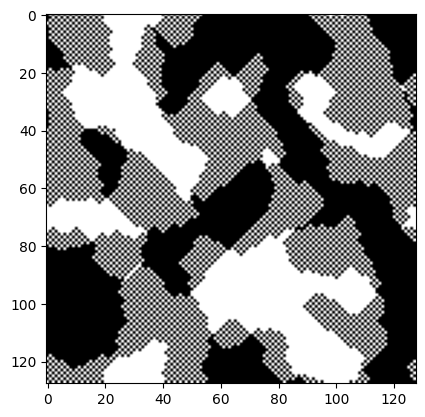

In [13]:
plt.set_cmap('gray')
sh=[128,128]
np.random.seed(117)
im_bin=2-np.ceil(2*np.random.rand(*sh))

beta_reg = 6

mafigure=plt.figure()

for n in range(30):
    echan(im_bin,beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

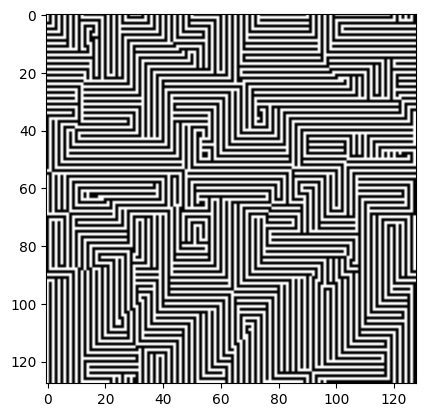

In [14]:
plt.set_cmap('gray')
sh=[128,128]
np.random.seed(117)
im_bin=2-np.ceil(2*np.random.rand(*sh))

beta_reg = -6

mafigure=plt.figure()

for n in range(30):
    echan(im_bin,beta_reg)

plt.figure()
plt.imshow(im_bin)
plt.show()

# A8

The similar labels in the diagonals creates 3 kinds of patterns in the resulting image:
1. Both diagonals are black, so the regions are all black;
2. Both diagonals are white, so the regions are all white;
3. Each diagnoal has a different color, so the regions are checkered.

In this case, all these types of regions are low-energy (since we changed the ising model).
As an interest side-effect, for $\beta < 0$, the patterns that emerge are made up of various lines. This happens because the minimization of energy occurs when diagonals are different $\iff$ there are lines in the image.